# Generating fake timesereis

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
# config to simulate traffic/time
config = [{'start':0,  'i': 1, 'cmin':0,  'cmax':0.1},
          {'start':1,  'i': 1, 'cmin':0,  'cmax':0.0},
          {'start':2,  'i': 1, 'cmin':0,  'cmax':0.0},
          {'start':3,  'i': 1, 'cmin':0,  'cmax':0.0},
          {'start':4,  'i': 1, 'cmin':0,  'cmax':0.1},
          {'start':5,  'i': 1, 'cmin':0,  'cmax':0.1},
          {'start':6,  'i': 1, 'cmin':0,  'cmax':0.5},
          {'start':7,  'i': 1, 'cmin':0,  'cmax':0.7},
          {'start':8,  'i': 1, 'cmin':0,  'cmax':1.0},
          {'start':9,  'i': 1, 'cmin':0,  'cmax':2.0},
          {'start':10, 'i': 1, 'cmin':0,  'cmax':2.5},
          {'start':11, 'i': 1, 'cmin':0,  'cmax':3.0},
          {'start':12, 'i': 1, 'cmin':0,  'cmax':3.5},
          {'start':13, 'i': 1, 'cmin':0,  'cmax':4.0},
          {'start':14, 'i': 1, 'cmin':0,  'cmax':4.0},
          {'start':15, 'i': 1, 'cmin':0,  'cmax':3.8},
          {'start':16, 'i': 1, 'cmin':0,  'cmax':3.5},
          {'start':17, 'i': 1, 'cmin':0,  'cmax':3.3},
          {'start':18, 'i': 1, 'cmin':0,  'cmax':3.0},
          {'start':19, 'i': 1, 'cmin':0,  'cmax':2.0},
          {'start':20, 'i': 1, 'cmin':0,  'cmax':1.0},
          {'start':21, 'i': 1, 'cmin':0,  'cmax':0.8},
          {'start':22, 'i': 1, 'cmin':0,  'cmax':0.5},
          {'start':23, 'i': 1, 'cmin':0,  'cmax':0.2},
         ]
# config to simulate traffic/day
dconfig = [{'date': 7, 'wday': 'Tue', 'dlevel':4.1},
           {'date': 8, 'wday': 'Wed', 'dlevel':4.8},
           {'date': 9, 'wday': 'Thu', 'dlevel':4.9},
           {'date': 10, 'wday': 'Fri', 'dlevel':5.4},
           {'date': 11, 'wday': 'Sat', 'dlevel':5.3},
           {'date': 12, 'wday': 'Sun', 'dlevel':5.7},
           {'date': 13, 'wday': 'Mon', 'dlevel':6.2},
           {'date': 14, 'wday': 'Tue', 'dlevel':6.0},
           {'date': 15, 'wday': 'Wed', 'dlevel':5.8}]

In [3]:
import random
from random import randrange

class User():
    def __init__(self, id, ulevel):
        self.user_id = 'u' + str(id).zfill(10)
        self.ulevel = ulevel
    
    def random_date(self, start, interval, l):
        current = start
        while l > 0:
            curr = current + datetime.timedelta(seconds=randrange(3600*interval))
            yield curr
            l-=1

    def click(self, date, dlevel=5):
        clicks = []
        for c in config:
            start_dt = datetime.datetime(2020,7,date,c['start'],00)
            cnt = np.random.normal(c['cmax'],3,1)[0] * round(np.random.normal(0,1,1)[0])
    
            rndcnt = int(round(cnt-5))
            for x in self.random_date(start_dt, c['i'], rndcnt):
                # to simulate traffic/page
                page = random.choices(population=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
                                      weights=[0.40, 0.1, 0.09, 0.09, 0.09, 0.09, 0.01, 0.01, 0.01, 0.01, 
                                               0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
                                      k=1)
                event = x.strftime("%Y-%m-%d %H:%M:%S") + " ; p" + str(page[0]).zfill(2) + " ; " + self.user_id
                clicks.append(event)
        return clicks

# repeat clicks during dcofnig days
def vclick(user):
    clicks = []
    for date in dconfig:
        dlevel=date['dlevel']*np.random.random_sample(1)
        click = user.click(date['date'], dlevel)
        clicks.extend(click)
    return clicks

# clicks of 10,000 fake users
def fake_click(n=10000):
    click_logs = []
    for uid in range(n):
        ulevel = 5*np.random.random_sample(1)[0]
        user = User(uid+1, ulevel)
        click_log = vclick(user)
        click_logs.extend(click_log)

    clicks = pd.DataFrame([s.split(';') for s in click_logs], columns=['timestamp','page','user'])
    clicks['timestamp'] = clicks['timestamp'].astype('datetime64')
    clicks['session_id'] = click_logs

    return clicks

#### 5,000 fake users

In [4]:
%%time
clicks = fake_click(5000)
clicks.head()

CPU times: user 15.9 s, sys: 47.7 ms, total: 16 s
Wall time: 15.9 s


,timestamp,page,user,session_id
0,2020-07-07 08:41:58,p03,u0000000001,2020-07-07 08:41:58 ; p03 ; u0000000001
1,2020-07-07 08:11:32,p02,u0000000001,2020-07-07 08:11:32 ; p02 ; u0000000001
2,2020-07-08 18:55:30,p00,u0000000001,2020-07-08 18:55:30 ; p00 ; u0000000001
3,2020-07-09 00:06:18,p19,u0000000001,2020-07-09 00:06:18 ; p19 ; u0000000001
4,2020-07-09 00:19:34,p00,u0000000001,2020-07-09 00:19:34 ; p00 ; u0000000001


### Adding program fault events


In [5]:
# Random program fault time
pgm_fault = [{"start":"2020-07-07 11:01:52", "end":"2020-07-07 11:40:19"},
             {"start":"2020-07-10 15:41:01", "end":"2020-07-10 16:14:27"},
             {"start":"2020-07-15 10:10:48", "end":"2020-07-15 11:23:21"}]

# return True if a given date is within the fault time range
def check_fdate(date, date_range):
    fault = False
    date = str(date)
    for ftime in date_range:
        if ((date >= ftime['start']) & (date <= ftime['end'])):
            fault = True 
            return fault
    return fault

# generate new clickstream with pgm fault events
def gen_click_pfault(clicks, erate=0.7):
    click_pfault = clicks.copy()
    idx = click_pfault.index
    error_date = list(clicks[clicks['timestamp'].apply(check_fdate,args=(pgm_fault,))].index)
    eidx = random.sample(error_date, k=round(len(error_date)* erate))
    nidx = list(set(idx) - set(eidx))
    click_pfault.loc[eidx, 'user'] = 'user_error'
    return click_pfault

def fault_label(stream, date_range):
    ad_label = []
    for i in stream.index:
        f = 0
        stime = str(i)
        etime = str(i + i.freq)

        for ftime in date_range:
            if ((stime >= ftime['start']) & (stime <= ftime['end'])) | \
               ((etime >= ftime['start']) & (etime <= ftime['end'])) | \
               ((stime <= ftime['start']) & (etime >= ftime['end'])) : 
                    f = 1
                    break
        ad_label.append(f)
    return ad_label

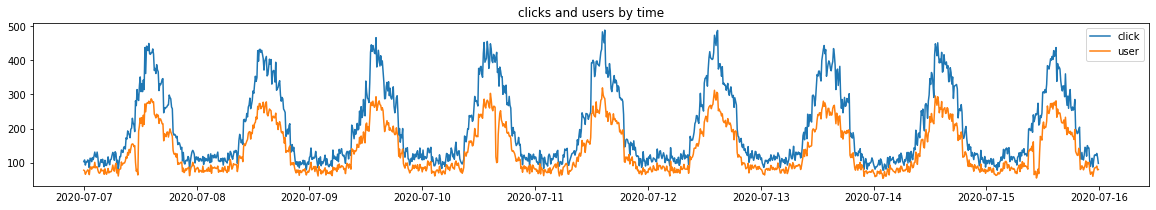

In [6]:
from util import *

clicks_pfault = gen_click_pfault(clicks, 0.7)
clicks_pfault_10T = resample_clickstream(clicks_pfault, '10T')
plot_clicks(clicks_pfault_10T)

In [7]:
# new_date = pd.date_range('2020-07-15 06:00:00','2020-07-15 18:00:00',freq='10T')
# plot_clicks(clicks_pfault_10T, start_dt = new_date[0], end_dt = new_date[-1])

### Adding system fault event


In [8]:
# Random system fault time
system_fault = [{"start":"2020-07-07 14:32:38", "end":"2020-07-07 14:45:02"},
                {"start":"2020-07-08 16:04:22", "end":"2020-07-08 16:13:59"},
                {"start":"2020-07-10 10:07:34", "end":"2020-07-10 10:18:37"},
                {"start":"2020-07-12 15:08:46", "end":"2020-07-12 15:16:39"},
                {"start":"2020-07-15 17:29:19", "end":"2020-07-15 17:38:13"}]

# Remove click records. (Resample excluding records in system fault time period.)
clicks_sfault = clicks_pfault.copy()
clicks_sfault = clicks_pfault[~clicks_pfault['timestamp'].apply(check_fdate, args=(system_fault,))]

Plot the result

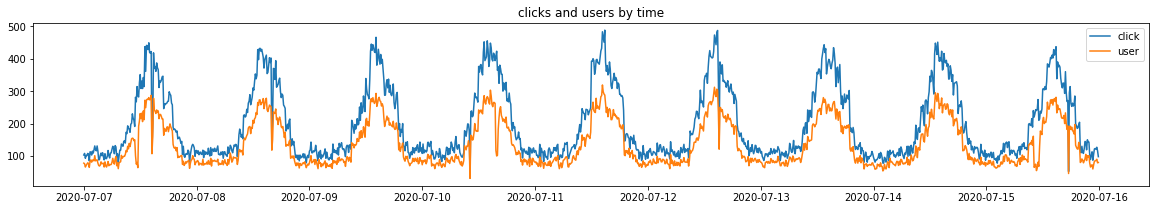

In [9]:
from util import *

clicks_sfault_10T = resample_clickstream(clicks_sfault, '10T')
plot_clicks(clicks_sfault_10T)

In [10]:
# new_date = pd.date_range('2020-07-15 06:00:00','2020-07-15 18:00:00',freq='10T')
# plot_clicks(clicks_sfault_10T, start_dt = new_date[0], end_dt = new_date[-1])

- Add and plot labels

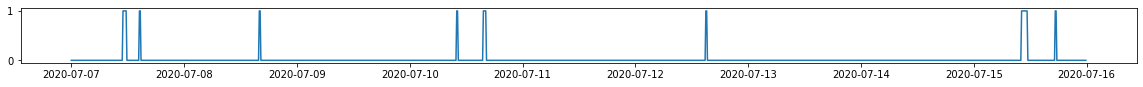

In [11]:
fault_label_10T = fault_label(clicks_sfault_10T, pgm_fault + system_fault)
plt.figure(figsize=(20,1))
plt.plot(clicks_sfault_10T.index, fault_label_10T)
plt.show()

- Another resmapling by 1 minute

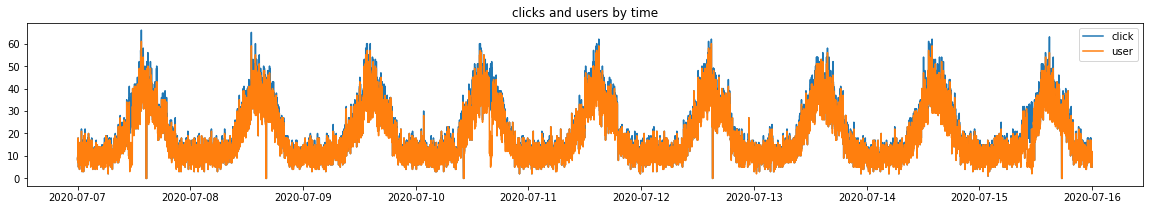

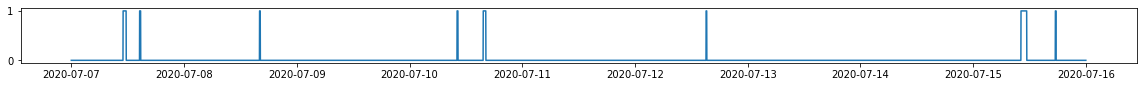

In [12]:
clicks_sfault_1T = resample_clickstream(clicks_sfault, '1T')
plot_clicks(clicks_sfault_1T)

fault_label_1T = fault_label(clicks_sfault_1T, pgm_fault + system_fault)
plt.figure(figsize=(20,1))
plt.plot(clicks_sfault_1T.index, fault_label_1T)
plt.show()


### Store data

In [18]:
import csv

def list_to_csv(mylist, filename):
    with open(filename, 'w', newline='\n') as myfile:
        wr = csv.writer(myfile)
        wr.writerow(mylist)
    
clicks_sfault.to_csv('data/clicks.csv', index=False)
clicks_sfault_10T.to_csv('data/clicks_10T.csv', index=True)
list_to_csv(fault_label_10T, 'data/fault_label_10T.csv')

clicks_sfault_1T.to_csv('data/clicks_1T.csv', index=True)
list_to_csv(fault_label_1T, 'data/fault_label_1T.csv')


In [19]:
!tar -zcvf data/data.tar.gz data
!rm data/*.csv

data/
data/fault_label_1T.csv
data/clicks_1T.csv
data/clicks.csv
data/.ipynb_checkpoints/
data/clicks_10T.csv
data/fault_label_10T.csv
tar: data: file changed as we read it
